# Access to core 13 data
Do NOT run and update this notebook itself (except when actually amending or improving it).   Instead, use the "Duplicate" option to make a copy, and use that to do visual validation.

In [3]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Standard startup

In [4]:
top='/groups/astro/buks/codes/dispatch2/'            # MK dispatch directory
#top='/groups/astro/xxxx/codes/dispatch2/'                  # xxxx

In [5]:
import os
os.chdir(top+'experiments/ramses_snapshots') # for reading snapshot from ramses
os.chdir(top+'experiments/ISM/python')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa

## Core 13 level 24 data

In [6]:
sns={}

In [7]:
data='/groups/astro/buks/codes/dispatch2/experiments/ISM/data'
io=222
sns[io]=dis.snapshot(io,'core_13',data)

directory /groups/astro/buks/codes/dispatch2/experiments/ISM/data/core_13/00222/ has no snapshot.nml file


In [48]:
data='/groups/astro/buks/codes/dispatch2/experiments/ISM/data'
for io in range(223,238):
    sn=dis.snapshot(io,'core_13',data)
    sns[io]=sn
    print('{:2d}{:7.1f} yr'.format(io,sn.time*21.37e6))

223   64.1 yr
224  128.2 yr
225  192.3 yr
226  256.4 yr
227  320.6 yr
228  384.7 yr
229  448.8 yr
230  512.9 yr
231  577.0 yr
232  641.1 yr
233  705.2 yr
234  769.3 yr
235  833.4 yr
236  897.5 yr
237  961.6 yr


In [68]:
sn=sns[237]
sn.time

4.499999999999999e-05

In [69]:
snst=sn.stat('logd')
snst

{'lmax': 20,
 'max': 2.7293877601623535,
 'min': -2.4868671894073486,
 'maxloc': [-0.48046875, -0.42578125, 0.29296875],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x7fd7a1c3f370>,
 'pmin': <dispatch._dispatch._patch at 0x7fd7a1c4dc30>,
 'rms': 0.5056176458936597,
 'average': -0.31033497051402803}

[0.19189691, -0.43587542, 0.28831053]


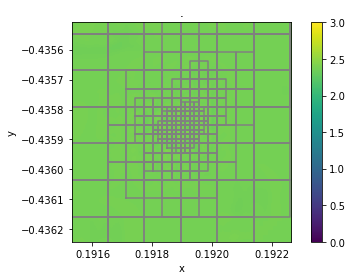

In [72]:
lmax=16
npix=48
c=snst['maxloc']
#c=[-0.1324058,-0.15126729,-0.14965178]
c=[0.19189691,-0.43587542,0.28831053]
print(c)
#c=np.array([0.0,0.0,0.29296875])
dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=20,mesh=1,ident=0,vmin=0,vmax=3,title='.')

KeyError: 233

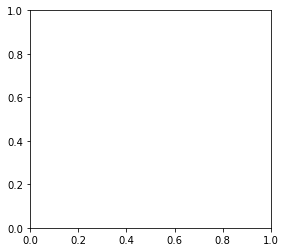

In [14]:
lmax=20
npix=96
c=snst['maxloc']
figure(0,figsize(25,4)); i=1
for io in range(233,238):
    subplot(1,5,i); i+=1
    sn=sns[io]
    dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=lmax,mesh=1,ident=0,vmin=7,title='.');

In [252]:
sn=sns[234]
sn.time

5.062317094999999e-06

In [253]:
snst=sn.stat('logd')
snst

{'lmax': 24,
 'max': 13.569666862487793,
 'min': -2.487703561782837,
 'maxloc': [0.19188931584358238, -0.4358772933483126, 0.2883105576038364],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x2b33ed9c4340>,
 'pmin': <dispatch._dispatch._patch at 0x2b33e9b04e80>,
 'rms': 0.5073642514647597,
 'average': -0.31400935892706144}

In [254]:
c=snst['maxloc']

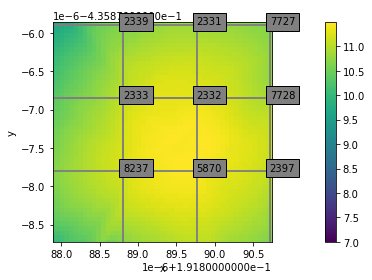

In [191]:
sn=sns[233]
lmax=24
npix=48
#c=[0.19189271330833396, -0.4358792603015904, 0.288312822580337]
dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=lmax,mesh=1,ident=1,vmin=7,title='.');

In [264]:
sn.cgs.au

14960000000000.0

In [270]:
sn.patchid[8237].ds[0]*sn.scaling.l/sn.cgs.au*96

4.721452845609123

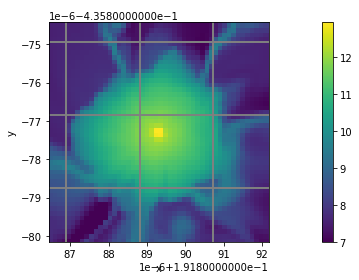

In [269]:
sn=sns[234]
lmax=23
npix=48
#c=[0.19189271330833396, -0.4358792603015904, 0.288312822580337]
dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=lmax,mesh=1,ident=0,vmin=7,title='.');

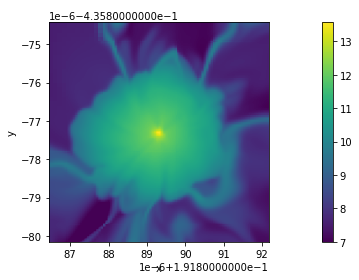

In [229]:
sn=sns[234]
lmax=24
npix=96
#c=[0.19189271330833396, -0.4358792603015904, 0.288312822580337]
dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=lmax,mesh=0,ident=0,vmin=7,title='.');

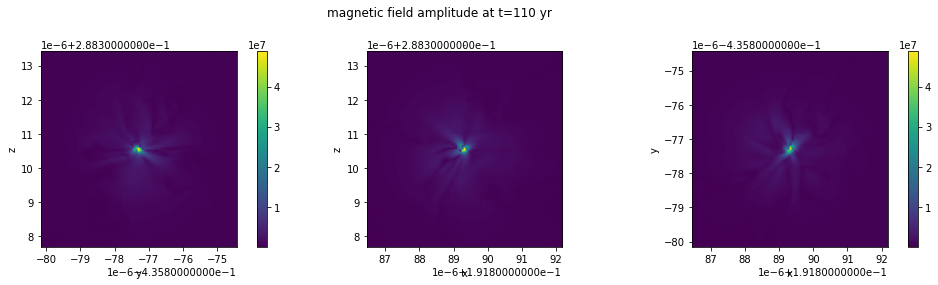

In [230]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(bx**2+by**2+bz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1e3,title='.');
suptitle('magnetic field amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

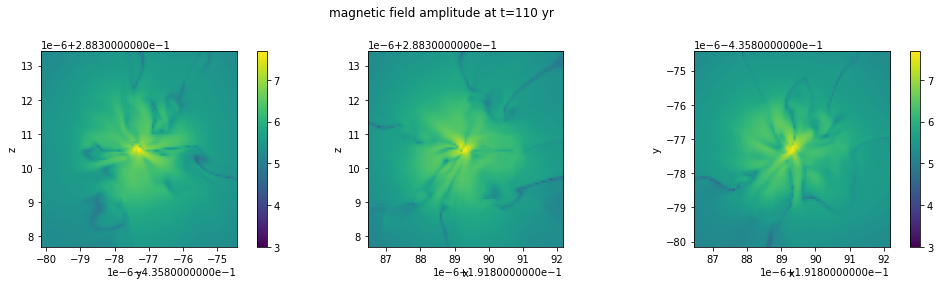

In [232]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='np.log10(bx**2+by**2+bz**2)/2',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=3,title='.');
suptitle('magnetic field amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

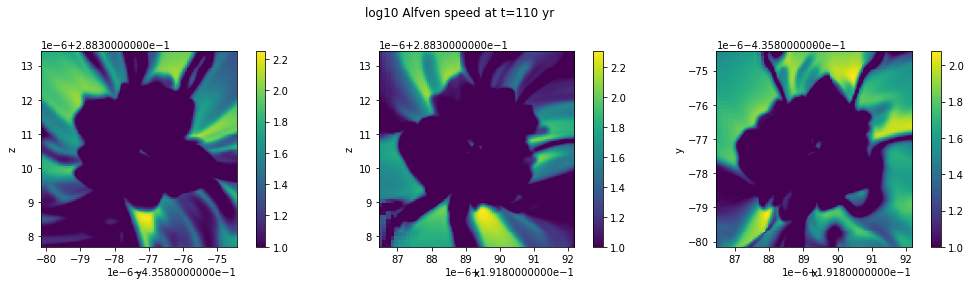

In [237]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='np.log10((bx**2+by**2+bz**2)/d)/2',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1,title='.');
suptitle('log10 Alfven speed at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

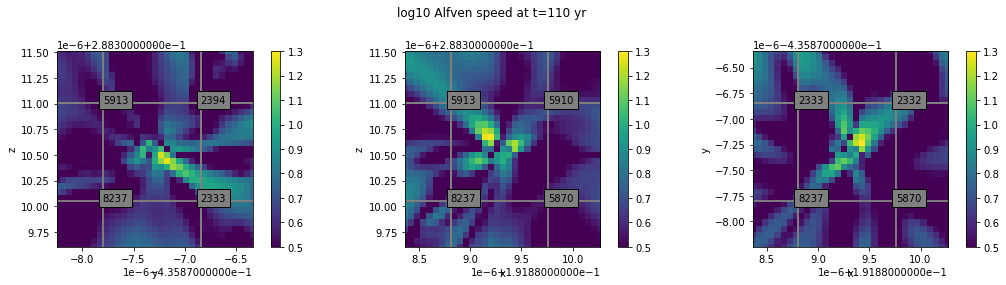

In [243]:
npix=32
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='np.log10((bx**2+by**2+bz**2)/d)/2',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=1,ident=1,vmin=0.5,vmax=1.3,title='.');
suptitle('log10 Alfven speed at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

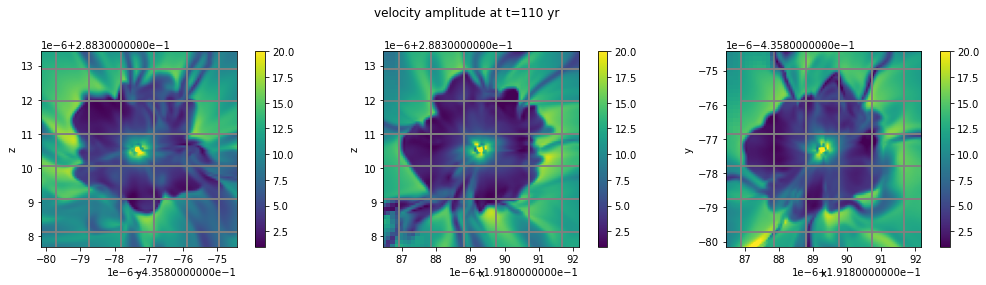

In [236]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(ux**2+uy**2+uz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=1,vmin=1,vmax=20,title='.');
suptitle('velocity amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

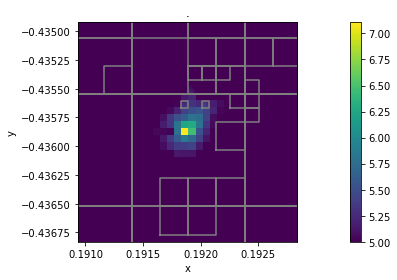

In [248]:
sn=sns[235]
lmax=18
npix=500
#c=[0.19189271330833396, -0.4358792603015904, 0.288312822580337]
dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,lmax=lmax,mesh=1,ident=0,vmin=5,title='.');

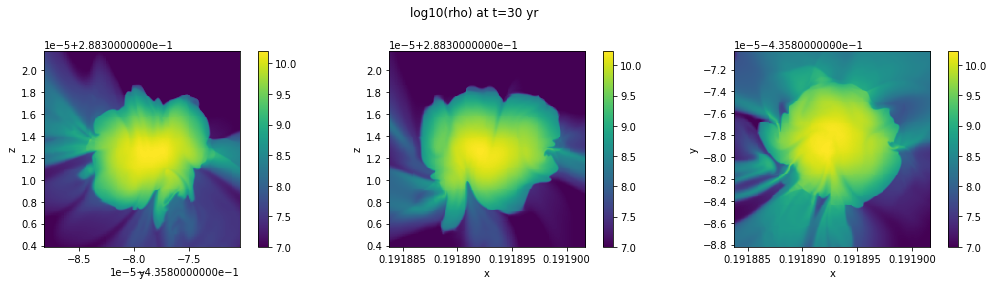

In [157]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=7,title='.');
suptitle('log10(rho) at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

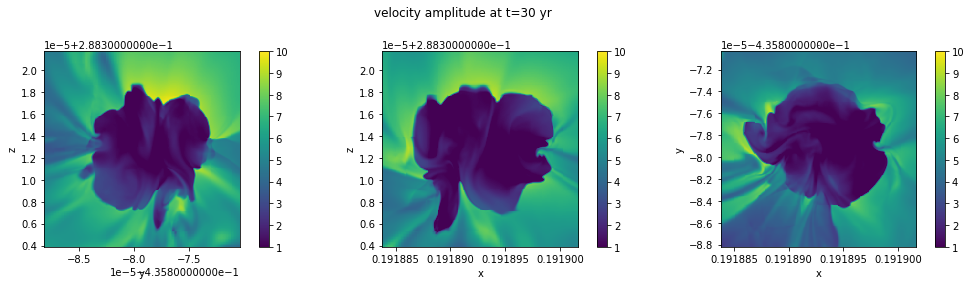

In [158]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(ux**2+uy**2+uz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1,vmax=10,title='.');
suptitle('velocity amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

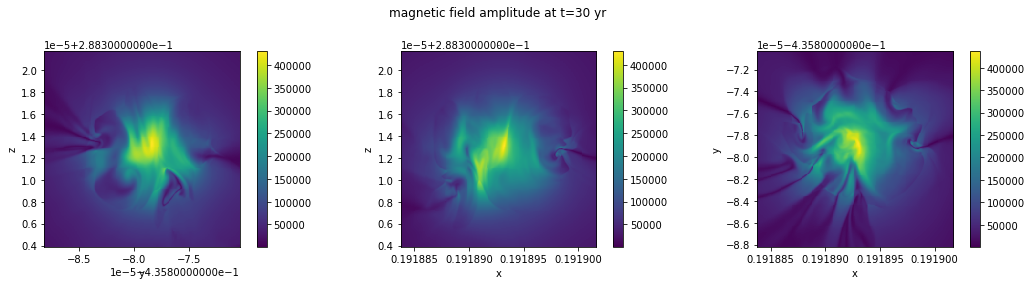

In [156]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(bx**2+by**2+bz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1e3,title='.');
suptitle('magnetic field amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

In [170]:
sn=sns[223]

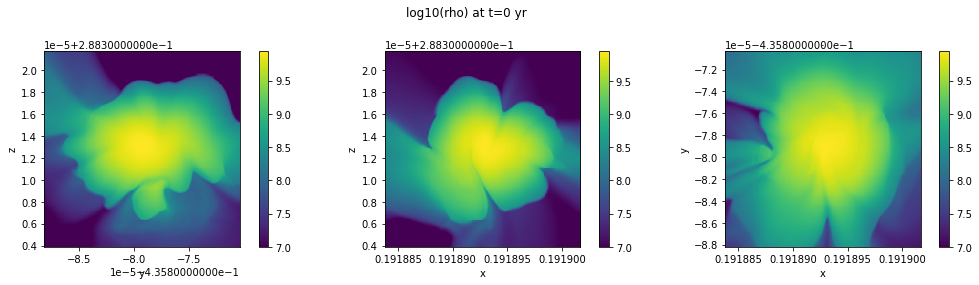

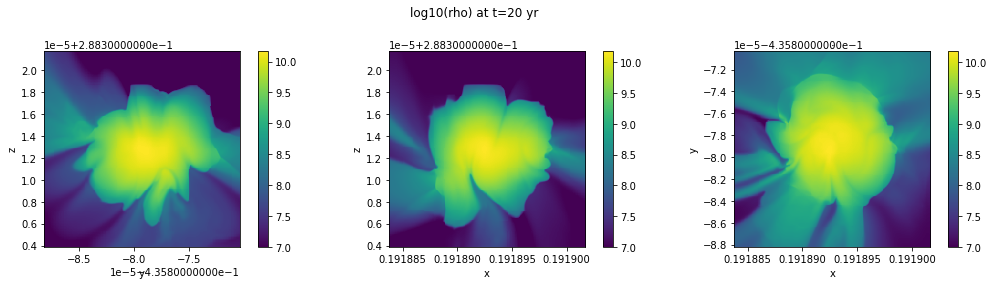

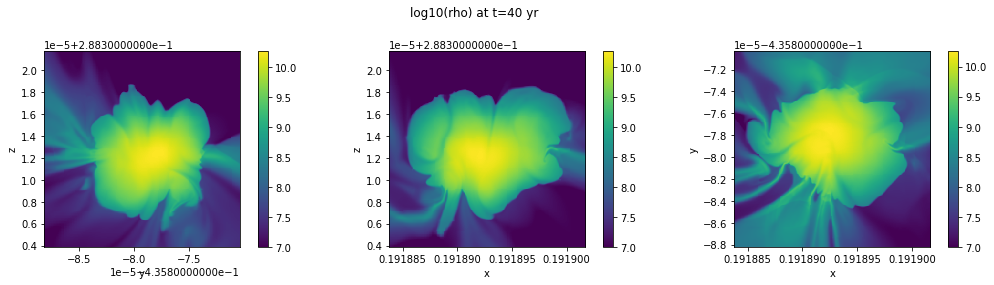

In [176]:
for io in range(223,228,2):
    sn=sns[io]
    figure(0,figsize(15,4)); i=1
    for axis in range(3):
        subplot(1,3,i); i+=1
        dgr.amr_plane(sn,iv='logd',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=7,title='.');
    suptitle('log10(rho) at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();
    show();

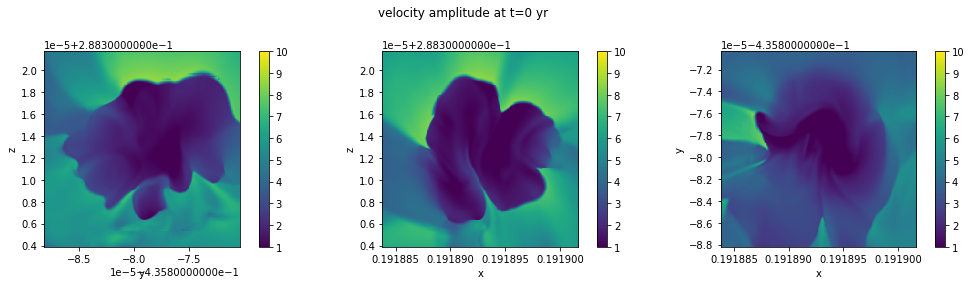

In [172]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(ux**2+uy**2+uz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1,vmax=10,title='.');
suptitle('velocity amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

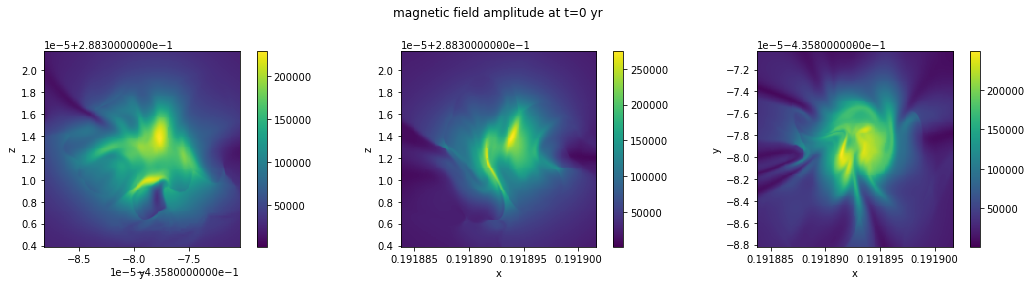

In [173]:
figure(0,figsize(15,4)); i=1
for axis in range(3):
    subplot(1,3,i); i+=1
    dgr.amr_plane(sn,iv='(bx**2+by**2+bz**2)**0.5',center=c,width=0.5**lmax*npix,axis=axis,lmax=lmax,mesh=0,vmin=1e3,title='.');
suptitle('magnetic field amplitude at t={:.0f} yr'.format(sn.time*21.73e6)); tight_layout();

## Checking Troels' ramses_snapshots conversion

In [99]:
data='/lustre/hpc/astro/aake/codes/dispatch2/experiments/ramses_snapshots/data'
sn1=dis.snapshot(223,'core_13_l24',data)

In [100]:
sn1.stat('logd')

{'lmax': 24,
 'max': 9.946599960327148,
 'min': -2.4877941608428955,
 'maxloc': [0.19189295172691306, -0.43587943911552474, 0.2883131802082063],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x2b338846a8e0>,
 'pmin': <dispatch._dispatch._patch at 0x2b3384768460>,
 'rms': 0.507962436901944,
 'average': -0.31494652919477983}

Med troels/dispatch.x

In [52]:
data='/lustre/hpc/astro/aake/codes/dispatch2/experiments/ramses_snapshots/data'
sn3=dis.snapshot(223,'core_13_l24',data)

In [60]:
sn3.patchid[8006].var('d').max()

8843014000.0

Med Troels' data

In [94]:
data='/lustre/hpc/astro/aake/codes/dispatch2/experiments/ramses_snapshots/data'
sn1=dis.snapshot(223,'core_13_l24',data)

In [95]:
sn1.stat('logd')

{'lmax': 24,
 'max': 9.946599960327148,
 'min': -2.4877941608428955,
 'maxloc': [0.19189295172691306, -0.43587943911552474, 0.2883131802082063],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x2b337ca048e0>,
 'pmin': <dispatch._dispatch._patch at 0x2b3379832b20>,
 'rms': 0.5079624369019312,
 'average': -0.31494652919477983}

In [96]:
data='/lustre/astro/troels/IMF_512_cores/sink_13/dispatch2/experiments/ramses_snapshots/data'
sn0=dis.snapshot(223,'core_13_l24',data)

In [97]:
sn0.stat('logd')

{'lmax': 24,
 'max': 2.7282214164733887,
 'min': -2.4877941608428955,
 'maxloc': [-0.48046875, -0.42578125, 0.29296875],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x2b337e94b9a0>,
 'pmin': <dispatch._dispatch._patch at 0x2b337ea249a0>,
 'rms': 0.5073775558251324,
 'average': -0.3133421973698806}

In [98]:
sn0.patchid[8006].var('d').min(),sn1.patchid[8006].var('d').max()

(236.40242, 8843014000.0)

In [5]:
#sn=dis.snapshot(223,'core_13_l24',data='./data') # for ramses_snapshot snapshot
sn=dis.snapshot(228) # for ISM run snapshot
pp=sn.patches
p=pp[0]
len(pp),p.id,p.rank,p.level

(8779, 1, 0, 4)

In [6]:
sns=sn.stat('logd')
sns

{'lmax': 24,
 'max': 2.776078224182129,
 'min': -2.487752914428711,
 'maxloc': [0.19188609719276473, -0.4358798563480377, 0.28831377625465404],
 'minloc': [-0.34765625, -0.39453125, 0.04296875],
 'pmax': <dispatch._dispatch._patch at 0x2b3306690670>,
 'pmin': <dispatch._dispatch._patch at 0x2b33050e1f70>,
 'rms': 0.5060532485092234,
 'average': -0.31102221074405567}

In [30]:
sns['max']

2.776078224182129